# **HEART DISEASE DATASET (STAGE-2)**

### **DATA ACQUISITION**

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
hr1=pd.read_csv('Heart_Dataset(1).csv',on_bad_lines='skip') 
hr1=hr1.rename(columns={'age':'AGE','sex':'SEX','cp':'CP','trestbps':'RBP','chol':'SCH','fbs':'FBS','restecg':'RES','thalach':'MHR','exang':'EIA','oldpeak':'OPK','slope':'PES','ca':'VCA','thal':'THA','LB1':'LB'})
hr1.head()

,Unnamed: 0,AGE,SEX,CP,RBP,SCH,FBS,RES,MHR,EIA,OPK,PES,VCA,THA,LB
0,0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,1
1,1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,1
2,2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,1
3,3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,1
4,4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,1


**OUTLIER DETECTION AND REMOVAL**

In [ ]:
import plotly.express as px
labels=["Healthy","Not Healthy"]
healthy_or_not = hr1['LB'].value_counts().tolist()
values = [healthy_or_not[0], healthy_or_not[1]]
print(healthy_or_not[0])
print(values)
fig = px.pie(values=hr1['LB'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"],title="Healthy vs Heart Disease")
fig.show()


526
[526, 499]


<Axes: >

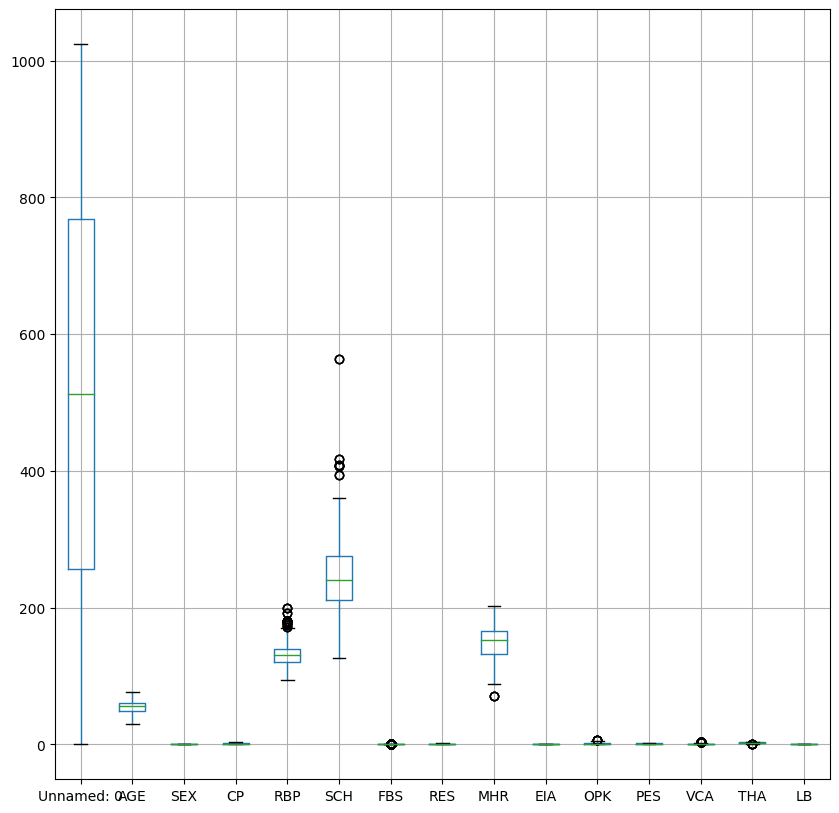

In [ ]:
hr1.boxplot(figsize=(10,10))

<Axes: >

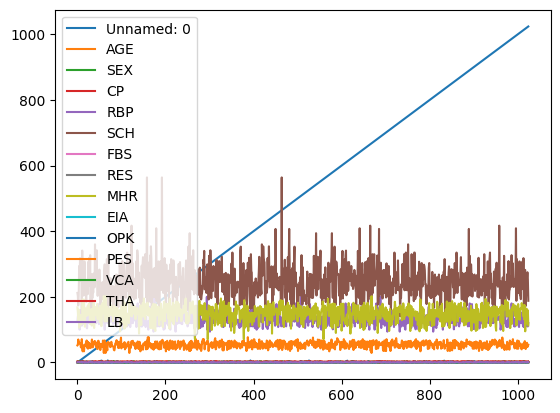

In [ ]:
hr1.plot()

In [ ]:
columns = ['AGE', 'RBP', 'SCH', 'MHR', 'OPK','SEX', 'CP', 'FBS', 'RES', 'EIA', 'PES','VCA','THA','LB']

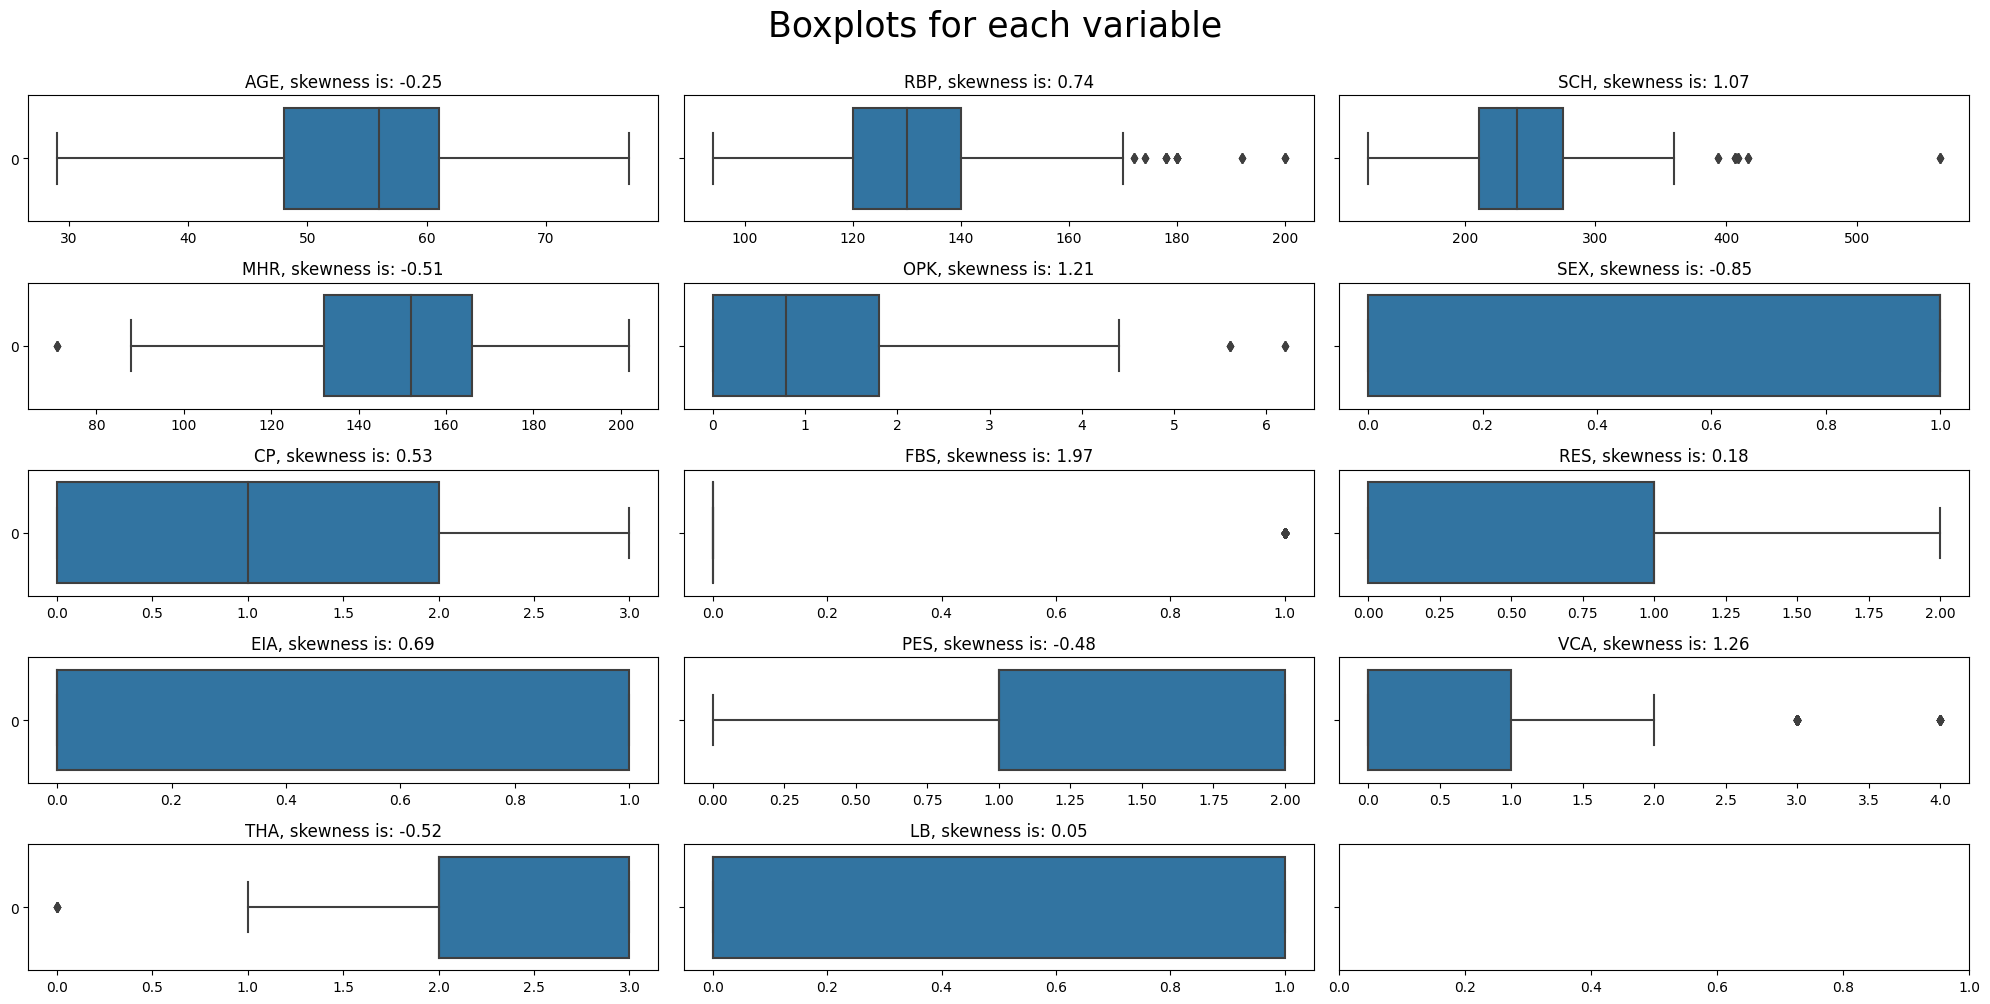

In [ ]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(20,10))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))     
boxplots_custom(dataset=hr1, columns_list=columns, rows=5, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

In [ ]:
def remove_outliers_zscore(df, columns, threshold=3):
    for col in columns:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        df[col][z_scores > threshold] = np.nan
    df.dropna(inplace=True)
columns = ['AGE', 'RBP', 'SCH', 'MHR', 'OPK','SEX', 'CP', 'FBS', 'RES', 'EIA', 'PES','VCA','THA','LB']
remove_outliers_zscore(hr1, columns)


In [ ]:
hr1.shape

(969, 15)

## **STAGE-2**

<Axes: >

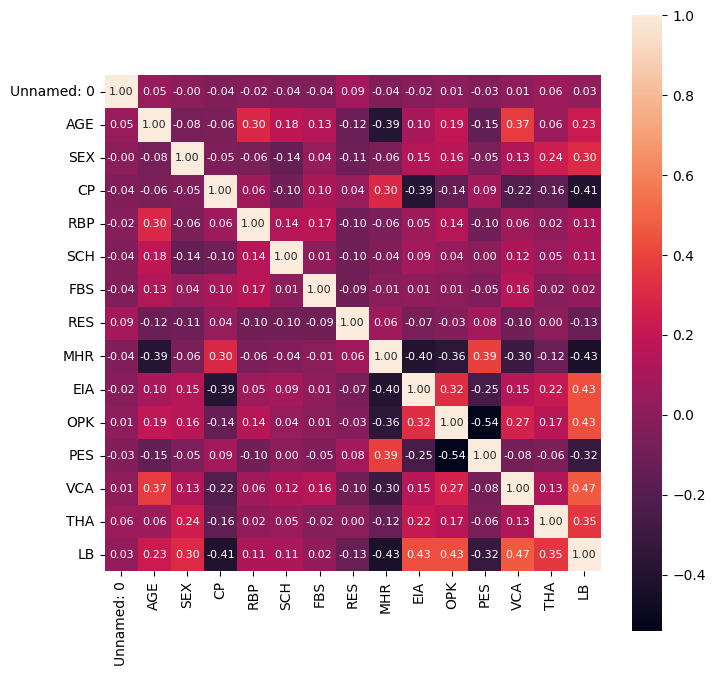

In [ ]:
correlation =hr1.corr()
plt.figure(figsize =(8,8))
sns.heatmap(correlation ,cbar=True ,square=True ,fmt='.2f',annot=True,annot_kws={'size':8})

In [ ]:
print(correlation['LB'])

Unnamed: 0    0.025091
AGE           0.227225
SEX           0.303739
CP           -0.408999
RBP           0.114757
SCH           0.112342
FBS           0.023629
RES          -0.127580
MHR          -0.429920
EIA           0.429825
OPK           0.431854
PES          -0.322791
VCA           0.466639
THA           0.352502
LB            1.000000
Name: LB, dtype: float64












## **DATA PREDICTION**

In [ ]:
X=hr1.iloc[:,[0,1,3,4,5,8,9,11,12]].values
y=hr1.iloc[:,-1].values

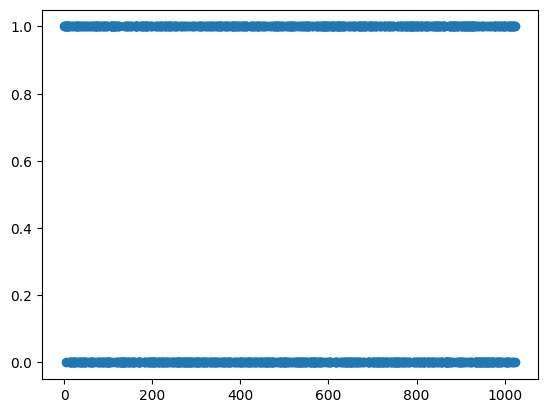

In [ ]:
plt.scatter(X[:,0],y)

In [ ]:
Xdf=pd.DataFrame(X)
Xdf.shape

(969, 9)

In [ ]:
y.shape

(969,)

In [ ]:
ydf=pd.DataFrame(y)
ydf.head(20)

,0
0,1
1,1
2,1
3,1
4,1
5,0
6,1
7,1
8,1
9,1


## **MACHINE LEARNING ALGORITHMS**





In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import time

models=[]
models.append(('NB',GaussianNB(var_smoothing=1e-5)))
models.append(('MLP',MLPClassifier(hidden_layer_sizes=(5,4),random_state=5,verbose=False,learning_rate_init=0.01)))
models.append(('DT',DecisionTreeClassifier(criterion='entropy',max_depth=1)))
models.append(('RF',RandomForestClassifier(n_estimators=7,max_depth=1)))
models.append(('SVM',SVC(kernel='linear',gamma=7,C=0.001)))

## **BASELINE IMPLEMENTATION**

**10(k)-fold**

In [ ]:
import time
accuracy=dict()
precision=dict()
recall=dict()
tt=dict()

from sklearn.model_selection import cross_val_score,KFold
for name,model in models:
    st=time.time()
    kfold=KFold(n_splits=10)
    acc=cross_val_score(model,X,y,cv=kfold,scoring='accuracy')
    accuracy[name]=(acc.mean())
    et=time.time()
    tt[name]=et-st

print("ACCURACY:")
for key,value in accuracy.items():
    print(key,value)

print("\nTime(10-K):")
for key,value in tt.items():
    print(key,value)


ACCURACY:
NB 0.8038445017182131
MLP 0.7966817010309278
DT 0.7388638316151204
RF 0.7791022336769761
SVM 0.7388530927835052

Time(10-K):
NB 0.03289151191711426
MLP 5.427802324295044
DT 0.01930093765258789
RF 0.15653085708618164
SVM 0.32170701026916504


**VARIANCE AND STANDARD DEVIATION**

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True)
variances = dict()
std_devs = dict()
for name, model in models:
    fold_variances = []
    fold_std_devs = []
    for fold_num, (train_indices, test_indices) in enumerate(kf.split(X)):
        model.fit(X[train_indices], y[train_indices])
        y_pred = model.predict(X[test_indices])
        mse = mean_squared_error(y[test_indices], y_pred)
        variance = np.var(y[test_indices] - y_pred)
        std_dev = np.sqrt(mse)
        fold_variances.append(variance)
        fold_std_devs.append(std_dev)
    variances[name] = (np.mean(fold_variances))/10
    std_devs[name] = (np.mean(fold_std_devs))/10
    
print("\nVariance:")
for key, value in variances.items():
    print(key, value)

print("\nStandard Deviation:")
for key, value in std_devs.items():
    print(key, value)



Variance:
NB 0.019633339823683885
MLP 0.02068357633630183
DT 0.026719837606539544
RF 0.021271300066573375
SVM 0.025935882601874977

Standard Deviation:
NB 0.04429656568449701
MLP 0.045969802046757983
DT 0.05205255063832055
RF 0.045944981852384194
SVM 0.05121294428212732


**50-50**

In [ ]:
import time
accuracy=dict()
precision=dict()
recall=dict()
tt=dict()
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

for name,model in models:
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=43)
    st=time.time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    et=time.time()
    from sklearn.preprocessing import StandardScaler 
    st_x= StandardScaler() 
    x_train= st_x.fit_transform(x_train)

    accuracy[name]=metrics.accuracy_score(y_test, y_pred)
    tt[name]=et-st
print("ACCURACY:")
for key,value in accuracy.items():
    print(key,value)
print("\nTime(10-K):")
for key,value in tt.items():
    print(key,value)

ACCURACY:
NB 0.777319587628866
MLP 0.8041237113402062
DT 0.7237113402061855
RF 0.7587628865979381
SVM 0.6659793814432989

Time(10-K):
NB 0.0072672367095947266
MLP 0.302013635635376
DT 0.0010750293731689453
RF 0.014376163482666016
SVM 0.014843463897705078


**60-40**

In [ ]:
accuracy=dict()
precision=dict()
recall=dict()
tt=dict()
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import time
for name,model in models:
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=43)
    st=time.time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    et=time.time()
    from sklearn.preprocessing import StandardScaler 
    st_x= StandardScaler() 
    x_train= st_x.fit_transform(x_train)

    accuracy[name]=metrics.accuracy_score(y_test, y_pred)
    tt[name]=et-st
print("ACCURACY:")
for key,value in accuracy.items():
    print(key,value)
print("\nTime(10-K):")
for key,value in tt.items():
    print(key,value)

ACCURACY:
NB 0.7860824742268041
MLP 0.8144329896907216
DT 0.7268041237113402
RF 0.788659793814433
SVM 0.6778350515463918

Time(10-K):
NB 0.0017139911651611328
MLP 0.3319091796875
DT 0.0010356903076171875
RF 0.014049291610717773
SVM 0.017980337142944336


**70-30**

In [ ]:
models=[]
models.append(('NB',GaussianNB(var_smoothing=1e-5)))
models.append(('MLP',MLPClassifier(hidden_layer_sizes=(5,4),random_state=5,verbose=False,learning_rate_init=0.01)))
models.append(('DT',DecisionTreeClassifier(criterion='entropy',max_depth=2)))
models.append(('RF',RandomForestClassifier(n_estimators=7,max_depth=3)))
models.append(('SVM',SVC(kernel='linear',gamma=7,C=0.001)))

In [ ]:
accuracy=dict()
precision=dict()
recall=dict()
time=dict()
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import time
for name,model in models:
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=43)
    st=time.time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    et=time.time()
    from sklearn.preprocessing import StandardScaler 
    st_x= StandardScaler() 
    x_train= st_x.fit_transform(x_train)

    accuracy[name]=metrics.accuracy_score(y_test, y_pred)
    tt[name]=et-st

print("ACCURACY:")
for key,value in accuracy.items():
    print(key,value)
print("\nTime(10-K):")
for key,value in tt.items():
    print(key,value)


ACCURACY:
NB 0.7938144329896907
MLP 0.8384879725085911
DT 0.7766323024054983
RF 0.8281786941580757
SVM 0.6941580756013745

Time(10-K):
NB 0.002923727035522461
MLP 0.3959989547729492
DT 0.0012531280517578125
RF 0.016773700714111328
SVM 0.022510290145874023


**80-20**

In [ ]:
models=[]
models.append(('NB',GaussianNB(var_smoothing=1e-5)))
models.append(('MLP',MLPClassifier(hidden_layer_sizes=(5,4),random_state=5,verbose=False,learning_rate_init=0.01)))
models.append(('DT',DecisionTreeClassifier(criterion='entropy',max_depth=2)))
models.append(('RF',RandomForestClassifier(n_estimators=20,max_depth=3)))
models.append(('SVM',SVC(kernel='linear',gamma = 0.01,C= 1)))

In [ ]:
accuracy=dict()
precision=dict()
recall=dict()
tt=dict()
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import time
for name,model in models:
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    st=time.time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    et=time.time()
    from sklearn.preprocessing import StandardScaler 
    st_x= StandardScaler() 
    x_train= st_x.fit_transform(x_train)
    accuracy[name]=metrics.accuracy_score(y_test, y_pred)
    tt[name]=et-st

print("ACCURACY:")
for key,value in accuracy.items():
    print(key,value)
print("\nTime(10-K):")
for key,value in tt.items():
    print(key,value)

ACCURACY:
NB 0.8247422680412371
MLP 0.8350515463917526
DT 0.7680412371134021
RF 0.8556701030927835
SVM 0.8195876288659794

Time(10-K):
NB 0.0031812191009521484
MLP 0.3301517963409424
DT 0.0013995170593261719
RF 0.04463028907775879
SVM 1.6726083755493164


In [ ]:
accuracy=dict()
precision=dict()
recall=dict()
f1score=dict()
roc=dict()
tt=dict()
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import time
for name,model in models:
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    st=time.time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    et=time.time()
    from sklearn.preprocessing import StandardScaler 
    st_x= StandardScaler() 
    x_train= st_x.fit_transform(x_train)
    precision[name]=metrics.precision_score(y_test, y_pred,average='micro')
    f1score[name]=metrics.f1_score(y_test,y_pred)
    recall[name]=metrics.recall_score(y_test, y_pred,average='micro')
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc[name]=auc(fpr, tpr)
    tt[name]=et-st

print("\nPRECISON:")
for key,value in precision.items():
    print(key,value)
print("\nF1 SCORE:")
for key,value in f1score.items():
    print(key,value)
print("\nRECALL:")
for key,value in recall.items():
    print(key,value)
print("\nROC:")
for key,value in roc.items():
    print(key,value)  
print("\nTime(10-K):")
for key,value in tt.items():
    print(key,value)


PRECISON:
NB 0.8247422680412371
MLP 0.8350515463917526
DT 0.8247422680412371
RF 0.8762886597938144
SVM 0.8814432989690721

F1 SCORE:
NB 0.8
MLP 0.8024691358024691
DT 0.8045977011494253
RF 0.8636363636363635
SVM 0.8685714285714285

RECALL:
NB 0.8247422680412371
MLP 0.8350515463917526
DT 0.8247422680412371
RF 0.8762886597938144
SVM 0.8814432989690721

ROC:
NB 0.8201177100053505
MLP 0.8270733012306047
DT 0.8218298555377208
RF 0.874585339753879
SVM 0.8793472445157837

Time(10-K):
NB 0.015813350677490234
MLP 1.0654163360595703
DT 0.013394832611083984
RF 0.20817875862121582
SVM 80.57562565803528


## **VOTING IMPLEMENTATION**

**10(k)-fold**

In [ ]:
from sklearn.ensemble import VotingClassifier
nb1 = GaussianNB(var_smoothing=1e-9)
nb2 = GaussianNB(var_smoothing=1e-5)
nb3 = GaussianNB(var_smoothing=1e-5)
voting_clfnb = VotingClassifier(estimators=[('naivebayes1', nb1), ('naivebayes2', nb2),('naivebayes3', nb3)], voting='hard')

In [ ]:
mlp1 = MLPClassifier(activation='relu',hidden_layer_sizes=(3,2),verbose=False,learning_rate_init=0.01,max_iter=10)
mlp2 = MLPClassifier(activation='relu',hidden_layer_sizes=(2,1),verbose=False,learning_rate_init=0.01,max_iter=100)
voting_clfmlp = VotingClassifier(estimators=[('multilp1', mlp1), ('multilp2', mlp2)], voting='hard')

In [ ]:
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=1,random_state=11)
clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
voting_clfdt = VotingClassifier(estimators=[('clf1', clf1), ('clf2', clf2)], voting='hard')

In [ ]:
rfc1 = RandomForestClassifier( max_depth=1)
rfc2 = RandomForestClassifier( max_depth=2,random_state=7)
voting_clfrf = VotingClassifier(estimators=[('rf1', rfc1), ('rf2', rfc2)], voting='hard')

In [ ]:
svm1 = SVC(kernel='linear', C=10)
svm2 = SVC(kernel='rbf', gamma=3.0, C=1)
voting_clfsvm = VotingClassifier(estimators=[('svm1', svm1), ('svm2', svm2)], voting='hard')

**10(K)- Fold**

In [ ]:
from sklearn.datasets import make_classification
def votingclffold(voting_clf):
  X, y = make_classification(n_samples=900, n_features=9, random_state=43) 
  kfold = KFold(n_splits=10, shuffle=True, random_state=43) 
  scores = cross_val_score(voting_clf, X, y, cv=kfold)
  accuracy=scores.mean()
  return accuracy

print("Voting(10-fold)- NB ",votingclffold(voting_clfnb))
print("Voting(10-fold)- MLP ",votingclffold(voting_clfmlp))
print("Voting(10-fold)- DT ",votingclffold(voting_clfdt))
print("Voting(10-fold)- RF ",votingclffold(voting_clfrf))
print("Voting(10-fold)- SVM ",votingclffold(voting_clfsvm))

Voting(10-fold)- NB  0.8877777777777778
Voting(10-fold)- MLP  0.6777777777777778
Voting(10-fold)- DT  0.8788888888888889
Voting(10-fold)- RF  0.8955555555555555
Voting(10-fold)- SVM  0.8277777777777778


**50-50**

In [ ]:
mlp1 = MLPClassifier(hidden_layer_sizes=(9,8),verbose=False,learning_rate_init=0.01,max_iter=1000)
mlp2 = MLPClassifier(hidden_layer_sizes=(7,6),verbose=False,learning_rate_init=0.01,max_iter=1000)
voting_clfmlp1 = VotingClassifier(estimators=[('multilp1', mlp1), ('multilp2', mlp2)], voting='soft')

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

def votingclf_fiftysplit(voting_clf):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=7)
  voting_clf.fit(x_train, y_train)
  y_pred = voting_clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

print("Voting(50-50)- MLP ",votingclf_fiftysplit(voting_clfmlp1))
print("Voting(50-50)- DT ",votingclf_fiftysplit(voting_clfdt))
print("Voting(50-50)- RF ",votingclf_fiftysplit(voting_clfrf))
print("Voting(50-50)- SVM ",votingclf_fiftysplit(voting_clfsvm))

Voting(50-50)- MLP  0.8082474226804124
Voting(50-50)- DT  0.7422680412371134
Voting(50-50)- RF  0.8123711340206186
Voting(50-50)- SVM  0.8536082474226804


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=7)
traindf=pd.DataFrame(x_train)
traindf.shape

(484, 9)

In [ ]:
from sklearn.naive_bayes import GaussianNB
X_train_df = pd.DataFrame(x_train)
X_test_df = pd.DataFrame(x_test)
nb1.fit(X_train_df.iloc[:100], y_train[:100])
nb2.fit(X_train_df.iloc[100:250], y_train[100:250])
nb3.fit(X_train_df.iloc[250:484], y_train[250:484])
ensemble = VotingClassifier(estimators=[('nb1', nb1), ('nb2', nb2),('nb3', nb3)], voting='soft')
ensemble.fit(X_train_df, y_train)
accuracy = ensemble.score(x_test, y_test)
print("Voting(50-50)- NB ",(accuracy))


Voting(50-50)- NB  0.8103092783505155


**60-40**

In [ ]:
mlp1 = MLPClassifier(hidden_layer_sizes=(9,8),verbose=False,learning_rate_init=0.01,max_iter=500)
mlp2 = MLPClassifier(hidden_layer_sizes=(7,4),verbose=False,learning_rate_init=0.01,max_iter=100)

voting_clfmlp1 = VotingClassifier(estimators=[('multilp1', mlp1), ('multilp2', mlp2)], voting='soft')

In [ ]:
def votingclf_sixtysplit(voting_clf):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=7)
  voting_clf.fit(x_train, y_train)
  y_pred = voting_clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

print("Voting(60-40)- MLP ",votingclf_sixtysplit(voting_clfmlp1))
print("Voting(60-40)- DT ",votingclf_sixtysplit(voting_clfdt))
print("Voting(60-40)- RF ",votingclf_sixtysplit(voting_clfrf))
print("Voting(60-40)- SVM ",votingclf_sixtysplit(voting_clfsvm))

Voting(60-40)- MLP  0.7963917525773195
Voting(60-40)- DT  0.7525773195876289
Voting(60-40)- RF  0.8195876288659794
Voting(60-40)- SVM  0.865979381443299


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=5)
traindf=pd.DataFrame(x_train)
traindf.shape

(581, 9)

In [ ]:
X_train_df = pd.DataFrame(x_train)
X_test_df = pd.DataFrame(x_test)
nb1.fit(X_train_df.iloc[:150], y_train[:150])
nb2.fit(X_train_df.iloc[150:400], y_train[150:400])
nb3.fit(X_train_df.iloc[400:584], y_train[400:584])
ensemble = VotingClassifier(estimators=[('nb1', nb1), ('nb2', nb2),('nb3', nb3)], voting='soft')
ensemble.fit(X_train_df, y_train)
accuracy = ensemble.score(x_test, y_test)
print("Voting(60-40)- NB ",(accuracy))


Voting(60-40)- NB  0.8118556701030928


**70-30**

In [ ]:
mlp1 = MLPClassifier(hidden_layer_sizes=(9,8,4),verbose=False,learning_rate_init=0.01,max_iter=500)
mlp2 = MLPClassifier(hidden_layer_sizes=(7,6,5),verbose=False,learning_rate_init=0.01,max_iter=100)

voting_clfmlp1 = VotingClassifier(estimators=[('multilp1', mlp1), ('multilp2', mlp2)], voting='soft')

In [ ]:
def votingclf_seventysplit(voting_clf):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)
  voting_clf.fit(x_train, y_train)
  y_pred = voting_clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

print("Voting(70-30)- MLP ",votingclf_seventysplit(voting_clfmlp1))
print("Voting(70-30)- DT ",votingclf_seventysplit(voting_clfdt))
print("Voting(70-30)- RF ",votingclf_seventysplit(voting_clfrf))
print("Voting(70-30)- SVM ",votingclf_seventysplit(voting_clfsvm))

Voting(70-30)- MLP  0.6219931271477663
Voting(70-30)- DT  0.7594501718213058
Voting(70-30)- RF  0.8041237113402062
Voting(70-30)- SVM  0.845360824742268


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)
traindf=pd.DataFrame(x_train)
traindf.shape

(678, 9)

In [ ]:
X_train_df = pd.DataFrame(x_train)
X_test_df = pd.DataFrame(x_test)
nb1.fit(X_train_df.iloc[:300], y_train[:300])
nb2.fit(X_train_df.iloc[300:450], y_train[300:450])
nb3.fit(X_train_df.iloc[450:678], y_train[450:678])
ensemble = VotingClassifier(estimators=[('nb1', nb1), ('nb2', nb2),('nb3',nb3)], voting='hard')
ensemble.fit(X_train_df, y_train)
accuracy = ensemble.score(x_test, y_test)
print("Voting(70-30)- NB ",(accuracy))

Voting(70-30)- NB  0.8041237113402062


**80-20**

In [ ]:
mlp1 = MLPClassifier(hidden_layer_sizes=(9,6,5),verbose=False,learning_rate_init=0.01,max_iter=300,learning_rate='constant')
mlp2 = MLPClassifier(hidden_layer_sizes=(4,3,2),verbose=False,learning_rate_init=0.01,max_iter=300,learning_rate='constant')

voting_clfmlp1 = VotingClassifier(estimators=[('multilp1', mlp1), ('multilp2', mlp2)], voting='soft')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)
traindf=pd.DataFrame(x_train)
traindf.shape

(775, 9)

In [ ]:
X_train_df = pd.DataFrame(x_train)
X_test_df = pd.DataFrame(x_test)
nb1.fit(X_train_df.iloc[:150], y_train[:150])
nb2.fit(X_train_df.iloc[150:400], y_train[150:400])
nb3.fit(X_train_df.iloc[400:775], y_train[400:775])
ensemble = VotingClassifier(estimators=[('nb1', nb1), ('nb2', nb2),('nb3',nb3)], voting='soft')
ensemble.fit(X_train_df, y_train)
accuracy = ensemble.score(x_test, y_test)
print("Voting(80-20)- NB ",(accuracy))

Voting(80-20)- NB  0.788659793814433


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
def votingclf_eightysplit(voting_clf):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)
  voting_clf.fit(x_train, y_train)
  y_pred = voting_clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy
print("\nACCURACY")
print("Voting(80-20)- MLP ",votingclf_eightysplit(voting_clfmlp1))
print("Voting(80-20)- DT ",votingclf_eightysplit(voting_clfdt))
print("Voting(80-20)- RF ",votingclf_eightysplit(voting_clfrf))
print("Voting(80-20)- SVM ",votingclf_eightysplit(voting_clfsvm))


def votingclf_eightysplit_pre(voting_clf):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=43)
  voting_clf.fit(x_train, y_train)
  y_pred = voting_clf.predict(x_test)
  precision = metrics.precision_score(y_test, y_pred)
  return precision
print("\nPRECISION")
print("Voting(80-20)- MLP ",votingclf_eightysplit(voting_clfmlp1))
print("Voting(80-20)- DT ",votingclf_eightysplit(voting_clfdt))
print("Voting(80-20)- RF ",votingclf_eightysplit(voting_clfrf))
print("Voting(80-20)- SVM ",votingclf_eightysplit(voting_clfsvm))

def votingclf_eightysplit_f1(voting_clf):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=43)
  voting_clf.fit(x_train, y_train)
  y_pred = voting_clf.predict(x_test)
  f1 = metrics.f1_score(y_test, y_pred)
  return f1
print("\nF1 SCORE")
print("Voting(80-20)- MLP ",votingclf_eightysplit(voting_clfmlp1))
print("Voting(80-20)- DT ",votingclf_eightysplit(voting_clfdt))
print("Voting(80-20)- RF ",votingclf_eightysplit(voting_clfrf))
print("Voting(80-20)- SVM ",votingclf_eightysplit(voting_clfsvm))

def votingclf_eightysplit_rec(voting_clf):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=43)
  voting_clf.fit(x_train, y_train)
  y_pred = voting_clf.predict(x_test)
  recall = metrics.recall_score(y_test, y_pred)
  return recall
print("\nRECALL")
print("Voting(80-20)- MLP ",votingclf_eightysplit(voting_clfmlp1))
print("Voting(80-20)- DT ",votingclf_eightysplit(voting_clfdt))
print("Voting(80-20)- RF ",votingclf_eightysplit(voting_clfrf))
print("Voting(80-20)- SVM ",votingclf_eightysplit(voting_clfsvm))


def votingclf_eightysplit_roc(voting_clf):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=43)
  voting_clf.fit(x_train, y_train)
  y_pred = voting_clf.predict(x_test)
  fpr, tpr, _ = roc_curve(y_test, y_pred)
  rocc=auc(fpr, tpr)
  return rocc
print("\nROC")
print("Voting(80-20)- MLP ",votingclf_eightysplit(voting_clfmlp1))
print("Voting(80-20)- DT ",votingclf_eightysplit(voting_clfdt))
print("Voting(80-20)- RF ",votingclf_eightysplit(voting_clfrf))
print("Voting(80-20)- SVM ",votingclf_eightysplit(voting_clfsvm))


ACCURACY
Voting(80-20)- MLP  0.8092783505154639
Voting(80-20)- DT  0.7628865979381443
Voting(80-20)- RF  0.8195876288659794
Voting(80-20)- SVM  0.8608247422680413

PRECISION
Voting(80-20)- MLP  0.8195876288659794
Voting(80-20)- DT  0.7628865979381443
Voting(80-20)- RF  0.8247422680412371
Voting(80-20)- SVM  0.8608247422680413

F1 SCORE
Voting(80-20)- MLP  0.8092783505154639
Voting(80-20)- DT  0.7628865979381443
Voting(80-20)- RF  0.8298969072164949
Voting(80-20)- SVM  0.8608247422680413

RECALL
Voting(80-20)- MLP  0.520618556701031
Voting(80-20)- DT  0.7628865979381443
Voting(80-20)- RF  0.8195876288659794
Voting(80-20)- SVM  0.8608247422680413

ROC
Voting(80-20)- MLP  0.520618556701031
Voting(80-20)- DT  0.7628865979381443
Voting(80-20)- RF  0.8247422680412371
Voting(80-20)- SVM  0.8608247422680413


## **BAGGING IMPLEMENTATION**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier

**10(k)-fold**

In [ ]:
models=[]
models.append(('NB',GaussianNB(var_smoothing=1e-5)))
models.append(('MLP',MLPClassifier(hidden_layer_sizes=(7,6),random_state=5,verbose=False,learning_rate_init=0.01)))
models.append(('DT',DecisionTreeClassifier(criterion='entropy',max_depth=2)))
models.append(('RF',RandomForestClassifier(n_estimators=7,max_depth=2)))
models.append(('SVM',SVC(kernel='linear',gamma = 0.01,C= 1)))

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

for estimator in models:
    bagging_clf = BaggingClassifier(base_estimator=estimator[1],n_estimators=7,max_features=9,max_samples=100,bootstrap=True, random_state=7)
    kf = KFold(n_splits=10, shuffle=True)
    all_predictions = []
    for train_index, test_index in kf.split(X):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]
      bagging_clf.fit(X_train, y_train)
      predictions = bagging_clf.predict(X_test)
      all_predictions.append(metrics.accuracy_score(y_test,predictions))
    final_predictions = np.mean(all_predictions, axis=0)
    print("Bagging(10-fold)- ",estimator[0], final_predictions)

Bagging(10-fold)-  NB 0.7977341065292096
Bagging(10-fold)-  MLP 0.7513208762886598
Bagging(10-fold)-  DT 0.805992268041237
Bagging(10-fold)-  RF 0.8256013745704468
Bagging(10-fold)-  SVM 0.7987220790378007


**50-50**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=7)
for estimator in models:
    bagging_clf = BaggingClassifier(base_estimator=estimator[1],n_estimators=15,max_features=9,max_samples=200,bootstrap=True, random_state=7)
    bagging_clf.fit(x_train, y_train)
    y_pred = bagging_clf.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Bagging(50-50)- ",estimator[0], accuracy)

Bagging(50-50)-  NB 0.8103092783505155
Bagging(50-50)-  MLP 0.8041237113402062
Bagging(50-50)-  DT 0.8041237113402062
Bagging(50-50)-  RF 0.8206185567010309
Bagging(50-50)-  SVM 0.8247422680412371


**60-40**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=7)
for estimator in models:
    bagging_clf = BaggingClassifier(base_estimator=estimator[1],n_estimators=15,max_features=9,max_samples=200,bootstrap=True, random_state=7)
    bagging_clf.fit(x_train, y_train)
    y_pred = bagging_clf.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Bagging(50-50)- ",estimator[0], accuracy)

Bagging(50-50)-  NB 0.7989690721649485
Bagging(50-50)-  MLP 0.8144329896907216
Bagging(50-50)-  DT 0.8092783505154639
Bagging(50-50)-  RF 0.8427835051546392
Bagging(50-50)-  SVM 0.8324742268041238


**70-30**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)
for estimator in models:
    bagging_clf = BaggingClassifier(base_estimator=estimator[1],n_estimators=15,max_features=9,max_samples=200,bootstrap=True, random_state=7)
    bagging_clf.fit(x_train, y_train)
    y_pred = bagging_clf.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Bagging(50-50)- ",estimator[0], accuracy)

Bagging(50-50)-  NB 0.8109965635738832
Bagging(50-50)-  MLP 0.7903780068728522
Bagging(50-50)-  DT 0.8109965635738832
Bagging(50-50)-  RF 0.8247422680412371
Bagging(50-50)-  SVM 0.8178694158075601


**80-20**

In [ ]:
models=[]
models.append(('NB',GaussianNB(var_smoothing=1e-5)))
models.append(('MLP',MLPClassifier(hidden_layer_sizes=(5,4),random_state=5,verbose=False,learning_rate_init=0.01)))
models.append(('DT',DecisionTreeClassifier(criterion='entropy',max_depth=1)))
models.append(('RF',RandomForestClassifier(n_estimators=11,max_depth=1)))
models.append(('SVM',SVC(kernel='linear',gamma = 0.01,C= 0.01)))

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print("ACCURACY")
for estimator in models:
    bagging_clf = BaggingClassifier(base_estimator=estimator[1],n_estimators=15,max_features=9,max_samples=300,bootstrap=True, random_state=7)
    bagging_clf.fit(x_train, y_train)
    y_pred = bagging_clf.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Bagging(80-20)- ",estimator[0], accuracy)

print("\nPRECISION")
for estimator in models:
    bagging_clf = BaggingClassifier(base_estimator=estimator[1],n_estimators=15,max_features=9,max_samples=100,bootstrap=True, random_state=7)
    bagging_clf.fit(x_train, y_train)
    y_pred = bagging_clf.predict(x_test)
    precision = metrics.precision_score(y_test, y_pred,average='micro')
    print("Bagging(80-20)- ",estimator[0], precision)

print("\nF1 SCORE")
for estimator in models:
    bagging_clf = BaggingClassifier(base_estimator=estimator[1],n_estimators=15,max_features=9,max_samples=100,bootstrap=True, random_state=7)
    bagging_clf.fit(x_train, y_train)
    y_pred = bagging_clf.predict(x_test)
    f1score = metrics.f1_score(y_test,y_pred)
    print("Bagging(80-20)- ",estimator[0], f1score)
  
print("\nRECALL")
for estimator in models:
    bagging_clf = BaggingClassifier(base_estimator=estimator[1],n_estimators=15,max_features=9,max_samples=100,bootstrap=True, random_state=7)
    bagging_clf.fit(x_train, y_train)
    y_pred = bagging_clf.predict(x_test)
    recall = metrics.recall_score(y_test, y_pred,average='micro')
    print("Bagging(80-20)- ",estimator[0], recall)

print("\nROC")
for estimator in models:
    bagging_clf = BaggingClassifier(base_estimator=estimator[1],n_estimators=15,max_features=9,max_samples=100,bootstrap=True, random_state=7)
    bagging_clf.fit(x_train, y_train)
    y_pred = bagging_clf.predict(x_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    rocc=auc(fpr, tpr)
    print("Bagging(80-20)- ",estimator[0], rocc)


ACCURACY
Bagging(80-20)-  NB 0.8350515463917526
Bagging(80-20)-  MLP 0.8247422680412371
Bagging(80-20)-  DT 0.7628865979381443
Bagging(80-20)-  RF 0.8298969072164949
Bagging(80-20)-  SVM 0.8247422680412371

PRECISION
Bagging(80-20)-  NB 0.8144329896907216
Bagging(80-20)-  MLP 0.8041237113402062
Bagging(80-20)-  DT 0.8350515463917526
Bagging(80-20)-  RF 0.8247422680412371
Bagging(80-20)-  SVM 0.7783505154639175

F1 SCORE
Bagging(80-20)-  NB 0.8105263157894738
Bagging(80-20)-  MLP 0.7738095238095237
Bagging(80-20)-  DT 0.813953488372093
Bagging(80-20)-  RF 0.8045977011494253
Bagging(80-20)-  SVM 0.7393939393939394

RECALL
Bagging(80-20)-  NB 0.8144329896907216
Bagging(80-20)-  MLP 0.8041237113402062
Bagging(80-20)-  DT 0.8350515463917526
Bagging(80-20)-  RF 0.8247422680412371
Bagging(80-20)-  SVM 0.7783505154639175

ROC
Bagging(80-20)-  NB 0.8182985553772072
Bagging(80-20)-  MLP 0.798501872659176
Bagging(80-20)-  DT 0.8313536650615303
Bagging(80-20)-  RF 0.8218298555377208
Bagging(80-20)